# Példa 1.15
Egy tartó keresztmetszetének terhelése tiszta hajlítás. Az $M_{\rm h}=3\,\rm{kNm}$ nagyságú hajlítónyomatéki igénybevétel vektorának irányát és értelmét az alábbi ábra mutatja:
<img src="Fig_1.15.png" style="width: 400px;">

A derékszögű háromszög alakú keresztmetszet mérete ismert: $a=9 \,\rm{cm}$.

Feladatok:

a) Határozzuk meg a keresztmetszet mentén a hajlításból adódó normálfeszültség eloszlását!

b) Mekkora $n$ biztonsági tényezővel felel meg hajlításra a tartó, ha $\sigma_{\mathrm{meg}}=150 \,\rm{MPa}$?

c) Határozzuk meg a zérustengely $x$-tengellyel bezárt $\beta$ szögét!

# Megoldás

A megoldás során szimbolikus számításokat fogunk végezni 
(azaz a konkrét értékeket csak a végén helyettesítjük be, előtte a képleteket írjuk fel és rendezzük át). Ehhez szükségünk van a `sympy` modulra.

In [1]:
import sympy as sp #betöltjük a sympy modult
sp.init_printing() # Eredmény szép megjelenítése (még a python "gyári" változói esetében is)

Definiáljuk a szükséges szimbólumokat:

In [2]:
a,M_h,σ_meg = sp.symbols("a,M_h,σ_meg")

A rendelkezésre álló adatok:

In [3]:
a_adat = 90 #mm
M_h_adat = 3 #kNm
σ_meg_adat = 150 #MPa

Hogy majd kényelmesebben helyettesíthessünk be, csinálunk belőlük egy listát:

In [4]:
osszesadat = [(a,a_adat),(M_h,M_h_adat),(σ_meg,σ_meg_adat)]

## a) feladatrész
Korábbi levezetés/segédlet (https://www.mm.bme.hu/~kossa/segedletek/sziltan/haromszogfomasodrendu.pdf) alapján:
$$I_1=I_{\tilde{x}}=\frac {a^4}{24}\\$$
$$I_2=I_{\tilde{y}}=\frac {a^4}{72}$$

$\tilde{x}$ és $\tilde{y}$ főtegelyek 45°-t zárnak be az $x$-$y$ koordináta rendszerrel.
<img src="Fig_1.15a.png" style="width: 400px;">

In [5]:
I1 = a**4/24
I1_eredmeny = I1.subs(osszesadat)
I1_eredmeny #mm^4  

In [6]:
I2 = a**4/72
I2_eredmeny = I2.subs(osszesadat)
I2_eredmeny #mm^4  

A terhelés felbontása a főtengelyek koordináta rendszerébe:
<img src="Fig_1.15b.png" style="width: 400px;">

In [7]:
Mxhullam = 1000000*M_h/sp.sqrt(2) #átváltás Nmm-be; 1000000 = 1e6 -> 1*10^6
Myhullam = 1e6*M_h/sp.sqrt(2) #átváltás Nmm-be
Mxhullam.subs(osszesadat).evalf(5) #Nmm

A főtengelyek körüli hajlításból származó feszültségek:
$$\sigma_z^{(\tilde{x})}=\frac{M_{\tilde{x}}}{I_{\tilde{x}}}\tilde{y}, \\$$
$$\sigma_z^{(\tilde{y})}=\frac{M_{\tilde{y}}}{I_{\tilde{y}}}\tilde{x}.$$
Ehhez kelleni fog nekünk $\tilde{x}$ és $\tilde{y}$ szimbólumként.

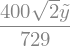

In [8]:
xhullam,yhullam = sp.symbols(r"\tilde{x},\tilde{y}") 
# \tilde{}: a hullám LaTeX kódja, hogy szépen írja ki.
# Ha LateX kódot írunk a nevekbe, használnunk kell a "" előtt az r karaktert.
# Ez mondja meg, hogy ez nyers (raw) szöveg, mert alapesetben pl a \t a tabulátort jelenti, \n az új sort, stb.

σ_z_xhullam = Mxhullam/I1*yhullam #a terhelés kNm-ben, a hossz mm-ben
σ_z_xhullam.subs(osszesadat)

In [9]:
σ_z_yhullam = Myhullam/I2*xhullam #a terhelés kNm-ben, a hossz mm-ben
σ_z_yhullam.subs(osszesadat).evalf(5)

Az ábrázoláshoz szükségünk van $\tilde{x}$ és $\tilde{y}$ minimum és maximum étékére. Ez a második ábra alapján:
$$\tilde{x}_{\rm min}=\frac{-2 a}{3 \sqrt{2}},\\$$
$$\tilde{x}_{\rm max}=\frac{ a}{3 \sqrt{2}},$$
$$\tilde{y}_{\rm min}=\frac{-a}{\sqrt{2}},$$
$$\tilde{y}_{\rm max}=\frac{ a}{\sqrt{2}}.$$

In [10]:
xhullam_min = sp.Rational(-2,3)*a/sp.sqrt(2)
# .Rational(szám1,szám2): 'szám1'/'szám2'-t szimbolikus törtté alakítja (egészeket!).
xhullam_min = xhullam_min.subs(osszesadat).evalf() #behelyettesítünk, numerikusan kiszámoljuk
xhullam_max = sp.Rational(1,3)*a/sp.sqrt(2)
xhullam_max = xhullam_max.subs(osszesadat).evalf()

yhullam_min = -a/sp.sqrt(2)
yhullam_min = yhullam_min.subs(osszesadat).evalf()
yhullam_max = a/sp.sqrt(2)
yhullam_max = yhullam_max.subs(osszesadat).evalf()

Az ábrázoláshoz betöltjük a szükséges csomagokat:

In [11]:
import matplotlib.pyplot as plt #betöltjük a matplotlib modult, amivel plotolhatunk
from numpy import linspace # Betöltjük a linspace függvényt a numpy modulból, amivel majd a plotoláshoz 
                           # készítjük az 'x' értékeket.

$\sigma_z^{(\tilde{x})}$ ábrázolása $\tilde{y}_{\rm min}$ és $\tilde{y}_{\rm max}$ között:

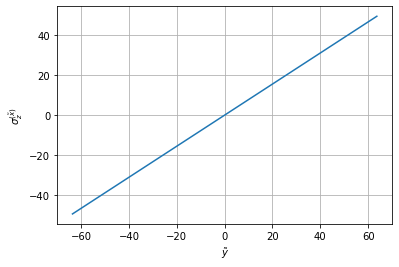

In [12]:
# A linspace függvény nem fogad el Sympy-féle lebegőpontos számot, konvertálnunk kell:
yhullam_min = float(yhullam_min) #most már sima lebegőpontos szám lesz, elfogadja a linspace
yhullam_max = float(yhullam_max)
yhullam_ertekek = linspace(yhullam_min,yhullam_max,101) #felveszünk 101 pontot 'yhullam' min. és max. értéke közt
σ_z_xhullam_ertekek = [σ_z_xhullam.subs(osszesadat).subs(yhullam,yhullam_ertek).evalf() \
                       for yhullam_ertek in yhullam_ertekek] # értékeket tartalmazó lista: "list comprehension"
                                                             # többsoros kód: '\'
    
# Két .subs egymás után: mivel az 'osszesadat' listában nincs benne 'yhullam', ezért kell még egy .subs, ahol
# azt is behelyettesítjük.

plt.plot(yhullam_ertekek,σ_z_xhullam_ertekek) 
plt.grid()
plt.xlabel(r"$\tilde{y}$") #a feliratban LateX kód: r karakter előtte
plt.ylabel(r"$\sigma_z^{(\tilde{x})}$")
plt.show()

$\sigma_z^{(\tilde{y})}$ ábrázolása $\tilde{x}_{\rm min}$ és $\tilde{x}_{\rm max}$ között:

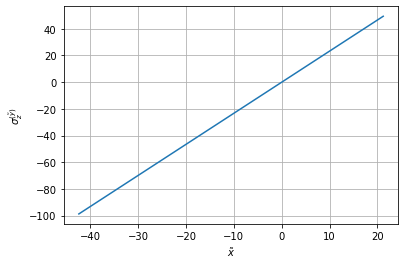

In [13]:
#a linspace függvény nem fogad el Sympy-féle lebegőpontos számot, konvertálnunk kell:
xhullam_min=float(xhullam_min) #most már sima lebegőpontos szám lesz, elfogadja a linspace
xhullam_max=float(xhullam_max)
xhullam_ertekek=linspace(xhullam_min,xhullam_max,101) #felveszünk 101 pontot 'xhullam' min. és max. értéke közt
σ_z_yhullam_ertekek = [σ_z_yhullam.subs(osszesadat).subs(xhullam,xhullam_ertek).evalf() \
                       for xhullam_ertek in xhullam_ertekek] # többsoros kód: '\' segítségével

plt.plot(xhullam_ertekek,σ_z_yhullam_ertekek) 
plt.grid()
plt.xlabel(r"$\tilde{x}$") #a feliratban LateX kód: r karakter előtte
plt.ylabel(r"$\sigma_z^{(\tilde{y})}$")
plt.show()

Megjegyzés: a  [list comprehension](https://www.datacamp.com/community/tutorials/python-list-comprehension?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-486527602543&utm_loc_interest_ms=&utm_loc_physical_ms=9063082&gclid=EAIaIQobChMIrZvm-9Hi5wIVR7TtCh0n4w3nEAAYASAAEgJNk_D_BwE)-t először az 1.10-es feladat kidolgozásánál használtuk, így részletesebb magyarázat annál a feladatnál található.

## b) feladatrész
A legnagyobb feszültség valamelyik sarokban várható.

A pont: $\tilde{x}=\frac{-2 a}{3 \sqrt{2}}$, $\tilde{y}=0.$

B pont: $\tilde{x}=\frac{a}{3 \sqrt{2}}$, $\tilde{y}=\frac{-a}{\sqrt{2}}.$

C pont: $\tilde{x}=\frac{a}{3 \sqrt{2}}$, $\tilde{y}=\frac{a}{\sqrt{2}}.$

A feszültségeket $\sigma_z^{(\tilde{x})}$ és $\sigma_z^{(\tilde{y})}$ összegeként számolhatjuk.

$\sigma_{\rm A}$ kiszámítása:

In [14]:
σ_A = σ_z_xhullam + σ_z_yhullam #feszültségek összege. 'σ_A'-ban 3 szimbolikus változó van, ezek helyére behelyettesítünk:
σ_A = σ_A.subs(xhullam,sp.Rational(-2,3)*a/sp.sqrt(2)).subs(yhullam,0) #Két .subs egymás után: egyszer az egyik
# változót helyettesítjük be, majd a másikat. Jelen esetben először 'xhullám' helyére írjuk be az adott
# kifejezést, ezt követően 'yhullám' helyére a 0-t.
σ_A = σ_A.subs(osszesadat) #a maradék adatot is beírjuk
σ_A.evalf(5) #MPa

$\sigma_{\rm B}$ kiszámítása:

In [15]:
σ_B = σ_z_xhullam + σ_z_yhullam #feszültségek összege
σ_B = σ_B.subs(xhullam,sp.Rational(1,3)*a/sp.sqrt(2)).subs(yhullam,-a/sp.sqrt(2)) #koordináták behelyettesítése
σ_B = σ_B.subs(osszesadat) #adatok beírása
σ_B.evalf(5) #MPa

$\sigma_{\rm C}$ kiszámítása:

In [16]:
σ_C = σ_z_xhullam + σ_z_yhullam #feszültségek összege
σ_C = σ_C.subs(xhullam,sp.Rational(1,3)*a/sp.sqrt(2)).subs(yhullam,a/sp.sqrt(2)) #koordináták behelyettesítése
σ_C = σ_C.subs(osszesadat) #adatok beírása
σ_C.evalf(5) #MPa

A maximális feszültség értékét természetesen "látjuk", és így beírhatnánk manuálisan. Ha teljesen automatizálni szeretnénk a számítást, akkor meg kell oldanunk ennek a lépésnek is az automatizálását.

In [17]:
σ_max = max([sp.Abs(σ_A),sp.Abs(σ_B),sp.Abs(σ_C)]) # A  jelen esetben beírt 3 érték közül a legnagyobbat 
# adja vissza. A feszültségek miatt mi az abszolút értékre vagyunk kíváncsiak.
σ_max.evalf(5) #MPa

A biztonsági tényező:

In [18]:
n = σ_meg/σ_max
n = n.subs(osszesadat)
n.evalf(5)

## c) feladatrész

Zérustengely: $$\sigma_z^{(\tilde{x})}+\sigma_z^{(\tilde{y})}=0.$$
Ezt az egyenletet megoldjuk $\tilde{y}$-ra:

In [19]:
zerust_egyenl_megoldas = sp.solve(σ_z_xhullam + σ_z_yhullam,yhullam) 
zerust_egyenl_megoldas

Láthatjuk, hogy 1 megoldást kaptunk (1 elemű a kapott lista). Ezt "kicsomagoljuk":

In [20]:
zerust_y = zerust_egyenl_megoldas[0]
zerust_y

A keresett $\beta$ szög:
<img src="Fig_1.15d.png" style="width: 400px;">

Az előbb kapott egyenes egyenletében $\tilde{x}$ együtthatója az ábrán lévő $\tilde{\beta}$ szög tangensével egyezik meg. "Valami" együtthatóit a `coeff(valami)` parancsal kaphatjuk meg.

In [21]:
egyutthato = zerust_y.coeff(xhullam)
egyutthato

In [22]:
βhullam = sp.atan(egyutthato) #arkusz tangens
βhullam = sp.deg(βhullam) #átváltjuk fokba
βhullam.evalf(5) #fok

Az ábra alapján: $\beta=\tilde{\beta}+45°$

In [23]:
β = βhullam + 45
β.evalf(5) #fok

## + Extra kíváncsiaknak

A `sympy` csomag `solve` függvénye több változós egyenletek esetében `dictionary`-ként kezeli. Ezt elő lehet hívni 1 változó esetére is.

A `dictionary` gyakorlatilag egy olyan lista, amelyet nem az elemeinek sorszáma hanem az elemeinek a címkéje (`key`) alapján lehet indexelni:

Például:

In [24]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
} # a 'dictionary'-t kapcsos zárójelbe kell tenni ({...})

thisdict["brand"]

'Ford'

Egyenletrendszer esetén a `solve` egy olyan `dictionary`-t hoz létre amiben a változó nevét (szimbólumát) használja címkének.

In [25]:
zerust_egyenl_megoldas = sp.solve(σ_z_xhullam + σ_z_yhullam,yhullam,dict = True) 
# dict=True: nem csak magát eredményt adja vissza, hanem odaírja a kifejezett változót is, ún. dictionaryt csinál.
zerust_egyenl_megoldas #megj: a LaTeX kód fordításához szükséges az `sp.init_printing()` parancs a dokumentum elején

Láthatjuk, hogy 1 megoldást kaptunk (1 elemű a kapott lista). Ezt "kicsomagoljuk":

In [26]:
zerust_y = zerust_egyenl_megoldas[0][yhullam] # [0]: az első megoldást nézzük (lehetne több is); 
                                              # [0][yhullam]: az első megoldáson belül az 'yhullam' értékére 
                                              # vagyunk kíváncsiak. Lehetne többváltozós egyenletrendszer is,
                                              # változónként több megoldással.
zerust_y